### Experimento 1: Baseline

Rodar uma regressão linear simples (sem normalização nem remoção de outliers), que será usada para comparações


--> uma alternativa aqui é: rodar um experimento em paralelo de vários baselines diferentes sem nenhum tratamento (com ou sem grid search, pois nao precisamos otimizar os hiperparametros agora ainda!!!)

- Linear Regression
- KRR
- RF

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Models
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression

#Metrics
from sklearn.metrics import mean_absolute_error
import shap
import matplotlib.pyplot as plt

In [4]:
X_train = pd.read_parquet("../Datasets/DF_split/X_train.parquet")
X_val = pd.read_parquet("../Datasets/DF_split/X_val.parquet")

In [5]:
y_train = pd.read_csv("../Datasets/DF_split/y_train.csv")
y_val = pd.read_csv("../Datasets/DF_split/y_val.csv")

## Linear Regression

In [6]:
# fit the model
LR = LinearRegression()
LR.fit(X_train, y_train)
# evaluate the LR
y_predict = LR.predict(X_val)
# evaluate predictions
mae_LR = mean_absolute_error(y_val, y_predict)
print('MAE: %.3f' % mae_LR)

MAE: 0.230


#### Feature Importance

In [48]:
# get importance
importance = LR.coef_
print("Size:", importance.size, ", Shape:", importance.shape)

Size: 75 , Shape: (1, 75)


In [62]:
# summarize feature importance
for i,v in enumerate(importance.flatten()):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00023
Feature: 2, Score: -0.00024
Feature: 3, Score: 0.00001
Feature: 4, Score: -0.00003
Feature: 5, Score: 0.00004
Feature: 6, Score: -0.00008
Feature: 7, Score: 0.00002
Feature: 8, Score: -0.00001
Feature: 9, Score: -0.00010
Feature: 10, Score: 0.00041
Feature: 11, Score: -0.00009
Feature: 12, Score: 0.00006
Feature: 13, Score: -0.01749
Feature: 14, Score: -0.00593
Feature: 15, Score: 0.00516
Feature: 16, Score: -0.00138
Feature: 17, Score: -0.00000
Feature: 18, Score: -0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.04144
Feature: 22, Score: 0.14481
Feature: 23, Score: -0.01872
Feature: 24, Score: -0.00297
Feature: 25, Score: -0.37470
Feature: 26, Score: 0.39642
Feature: 27, Score: -0.89784
Feature: 28, Score: -0.26875
Feature: 29, Score: -0.01009
Feature: 30, Score: 0.17817
Feature: 31, Score: -0.00922
Feature: 32, Score: -1.03768
Feature: 33, Score: -0.40501
Feature: 34, Score: 0.44877
Feature: 3

In [65]:
importance

array([[ 1.86873605e-10,  2.29055166e-04, -2.43543216e-04,
         1.39471476e-05, -3.03580842e-05,  4.22815272e-05,
        -7.58664219e-05,  1.95604385e-05, -6.17133280e-06,
        -1.00802757e-04,  4.14765724e-04, -8.50949946e-05,
         5.82043723e-05, -1.74916854e-02, -5.92562395e-03,
         5.16146028e-03, -1.37933067e-03, -1.52473520e-13,
        -3.28886224e-14,  5.62744296e-15,  9.85322934e-16,
         4.14369552e-02,  1.44807228e-01, -1.87180383e-02,
        -2.96677030e-03, -3.74700798e-01,  3.96418217e-01,
        -8.97840677e-01, -2.68748166e-01, -1.00862180e-02,
         1.78167975e-01, -9.22496958e-03, -1.03768061e+00,
        -4.05008434e-01,  4.48771916e-01,  8.55108260e-02,
        -3.32775248e-02,  2.94171414e-02, -1.56390011e-02,
         4.50561425e-02, -3.03687185e-02, -6.80846529e-03,
         3.65781933e-02,  6.04892648e-02, -4.33866586e-02,
         4.03690430e-02, -9.52596768e-05,  3.12864601e-02,
        -1.35014006e-02, -4.29447810e-02,  2.01890116e-0

In [66]:
importance.flatten()

array([ 1.86873605e-10,  2.29055166e-04, -2.43543216e-04,  1.39471476e-05,
       -3.03580842e-05,  4.22815272e-05, -7.58664219e-05,  1.95604385e-05,
       -6.17133280e-06, -1.00802757e-04,  4.14765724e-04, -8.50949946e-05,
        5.82043723e-05, -1.74916854e-02, -5.92562395e-03,  5.16146028e-03,
       -1.37933067e-03, -1.52473520e-13, -3.28886224e-14,  5.62744296e-15,
        9.85322934e-16,  4.14369552e-02,  1.44807228e-01, -1.87180383e-02,
       -2.96677030e-03, -3.74700798e-01,  3.96418217e-01, -8.97840677e-01,
       -2.68748166e-01, -1.00862180e-02,  1.78167975e-01, -9.22496958e-03,
       -1.03768061e+00, -4.05008434e-01,  4.48771916e-01,  8.55108260e-02,
       -3.32775248e-02,  2.94171414e-02, -1.56390011e-02,  4.50561425e-02,
       -3.03687185e-02, -6.80846529e-03,  3.65781933e-02,  6.04892648e-02,
       -4.33866586e-02,  4.03690430e-02, -9.52596768e-05,  3.12864601e-02,
       -1.35014006e-02, -4.29447810e-02,  2.01890116e-02, -7.12109833e-02,
       -4.34689442e-02, -

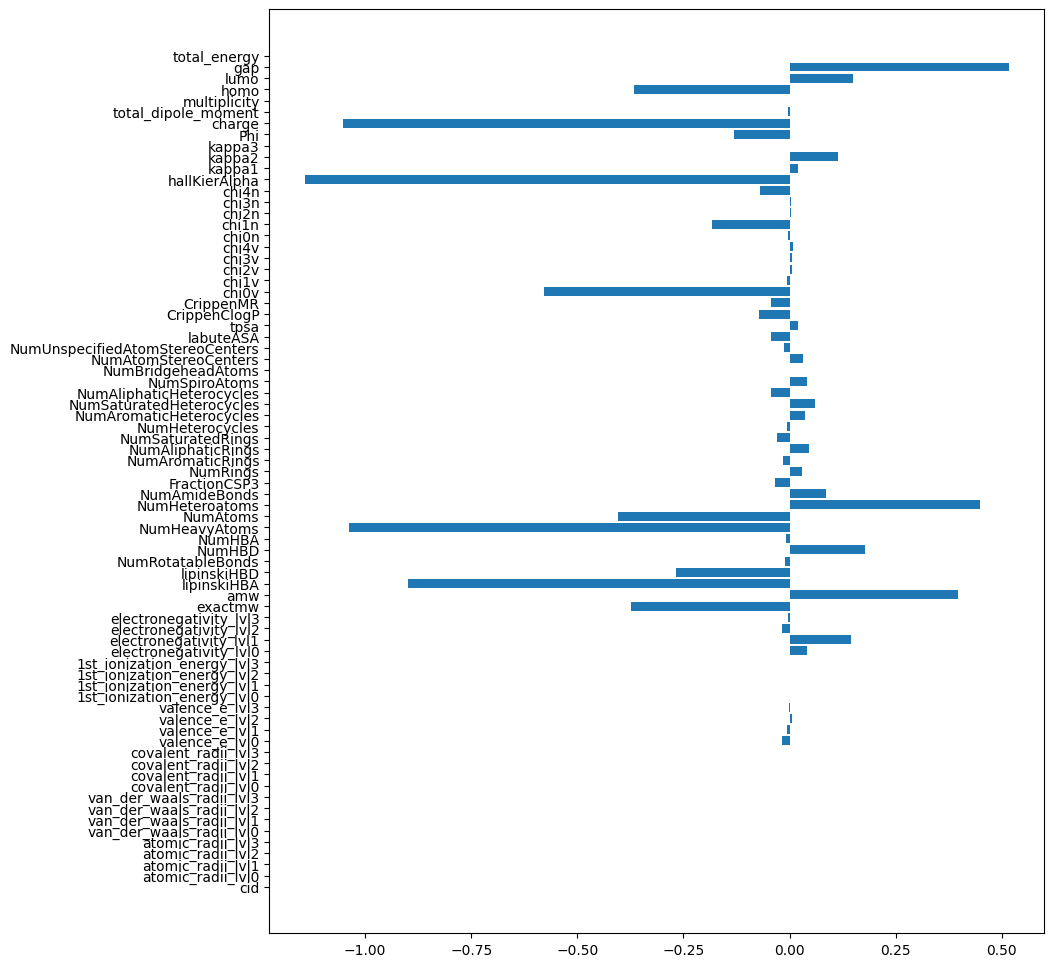

In [76]:
# plot feature importance
plt.figure(figsize=(10,12))
plt.barh(LR.feature_names_in_, importance.flatten())
plt.show()

#### SHAP

(500, 75)


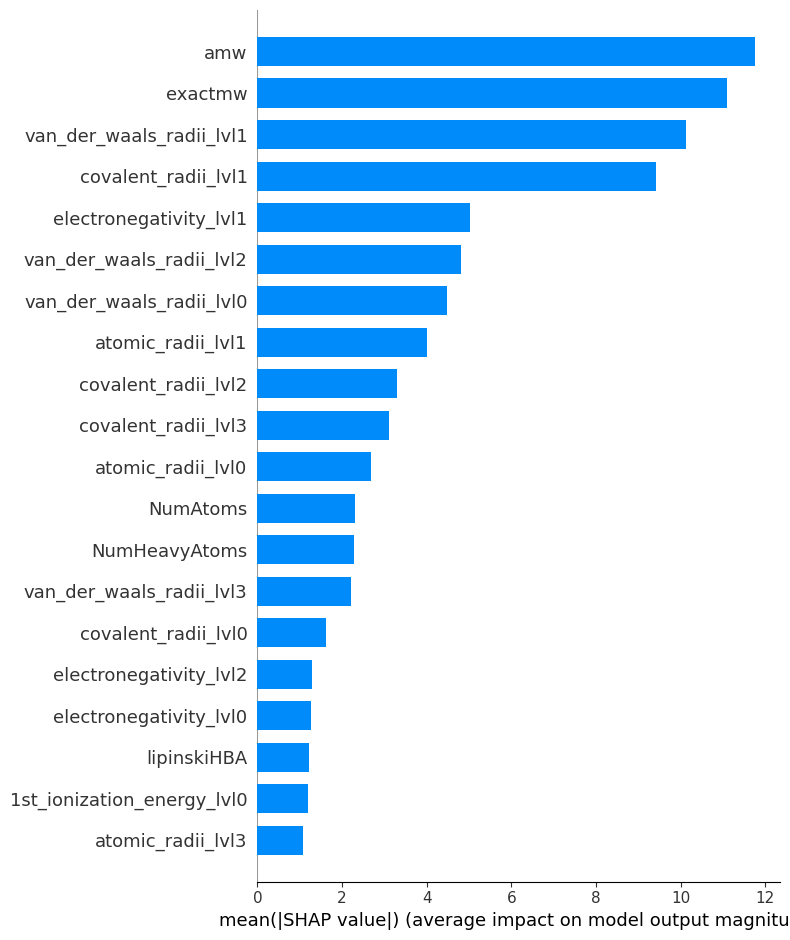

CPU times: total: 984 ms
Wall time: 1 s


In [28]:
%%time

explainer = shap.Explainer(LR.predict, X_sub)

# Create a linear explainer
LR_explainer = shap.Explainer(LR, X_train, feature_names=X_train.columns.tolist())

# Shap values with tree explainer
shap_values = LR_explainer.shap_values(X_train.sample(500, random_state=1))
print(shap_values.shape)

shap.summary_plot(
    shap_values, X_train.sample(500, random_state=1), feature_names=X_train.columns, plot_type="bar"
)

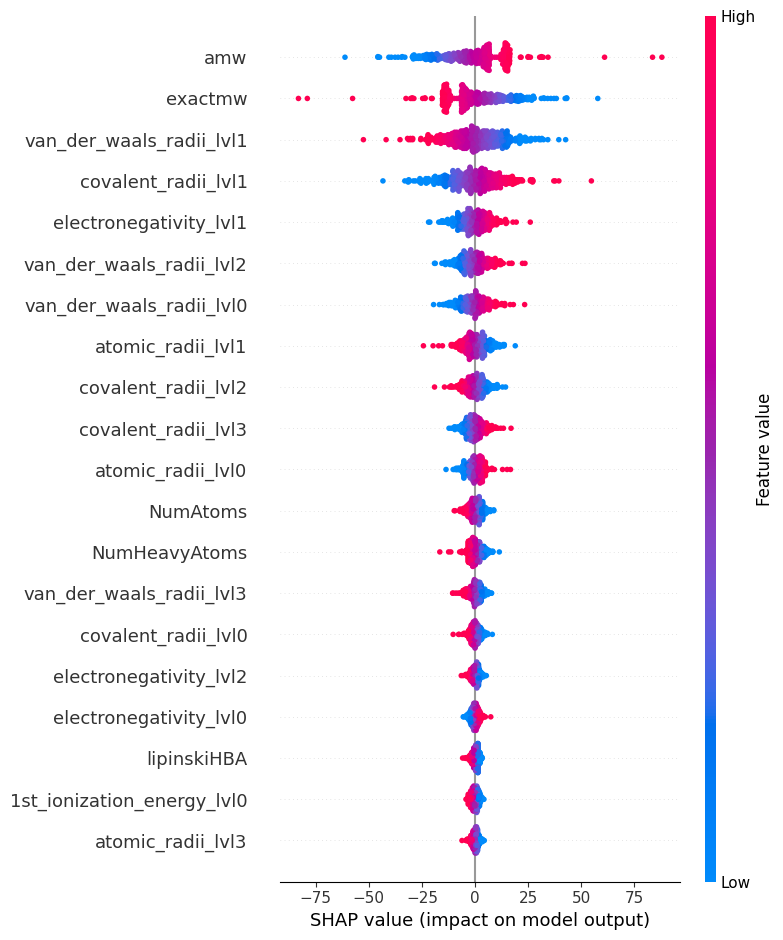

In [29]:
shap.summary_plot(shap_values, X_train.sample(500, random_state=1), feature_names=X_train.columns)

## Ridge Regressor

In [79]:
# fit the model
RD = Ridge()
RD.fit(X_train, y_train)
# evaluate the RD
y_predict = RD.predict(X_val)
# evaluate predictions
mae_RD = mean_absolute_error(y_val, y_predict)
print('MAE: %.3f' % mae_RD)

Ill-conditioned matrix (rcond=6.62853e-34): result may not be accurate.


MAE: 0.229


#### Feature Importance

Size: 75 , Shape: (1, 75)


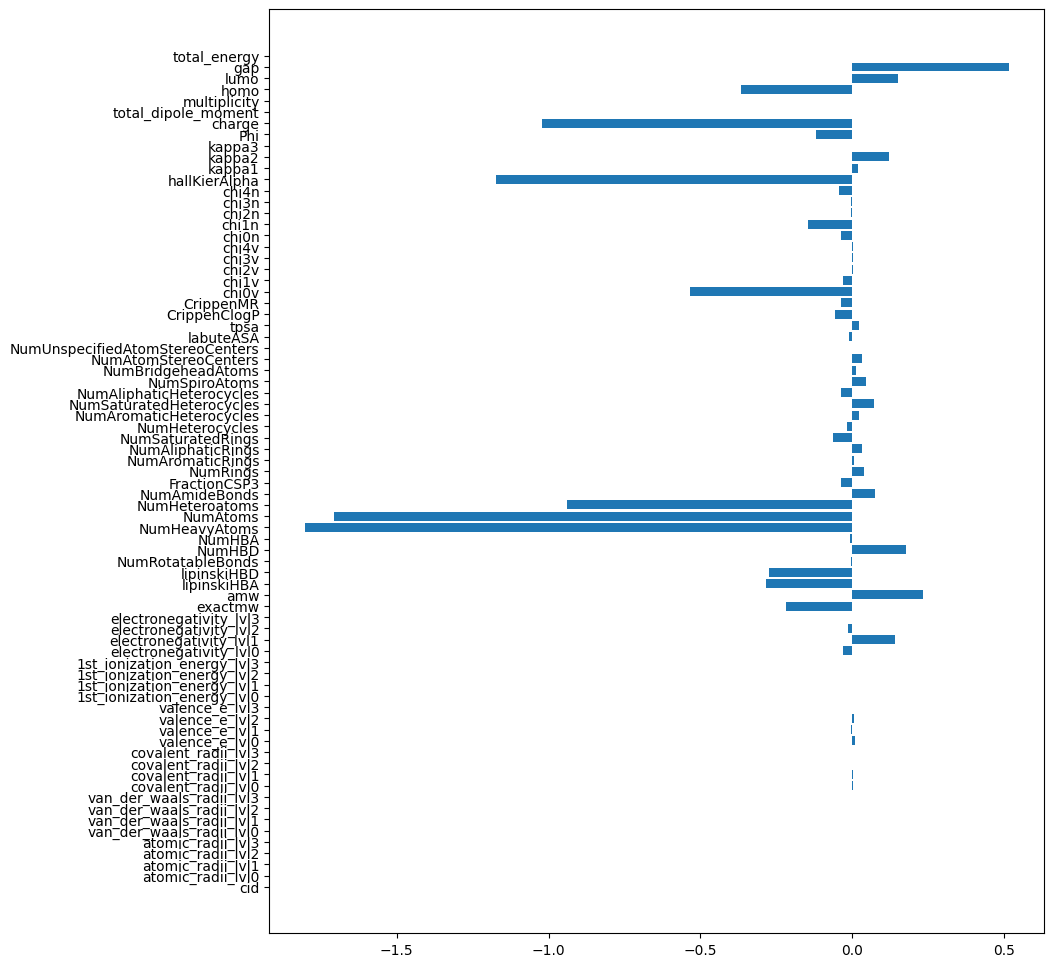

In [85]:
# get importance
importance = RD.coef_
print("Size:", importance.size, ", Shape:", importance.shape)

# plot feature importance
plt.figure(figsize=(10,12))
plt.barh(RD.feature_names_in_, importance.flatten())
plt.show()

#### SHAP

(500, 75)


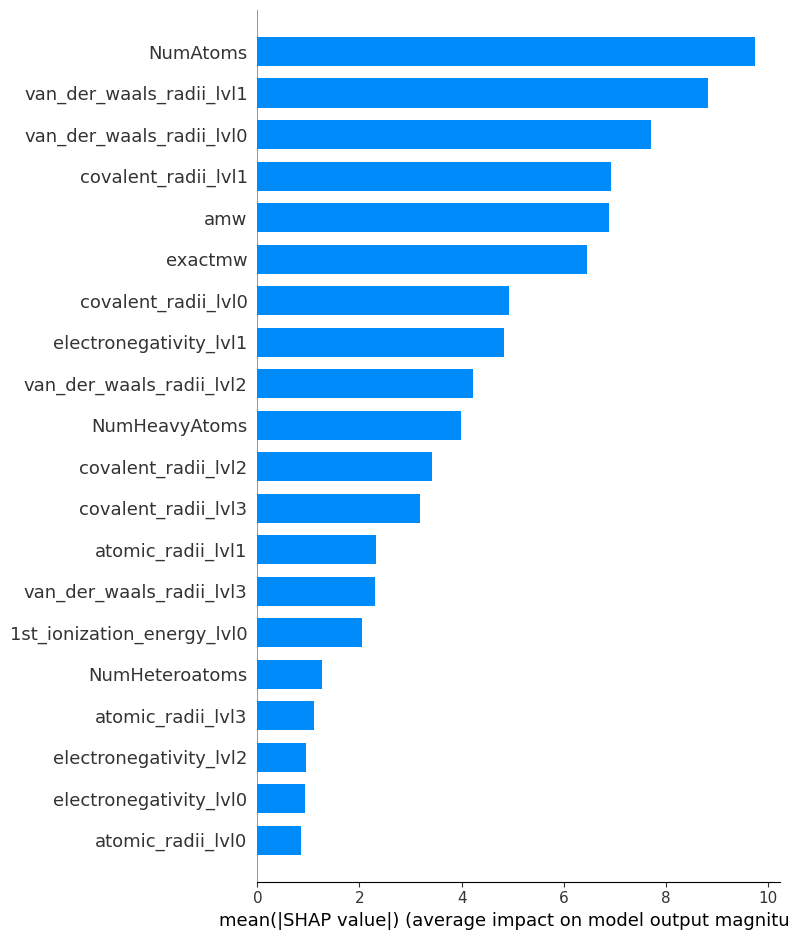

CPU times: total: 1.17 s
Wall time: 1.26 s


In [80]:
%%time

explainer = shap.Explainer(RD.predict, X_sub)

# Create a linear explainer
RD_explainer = shap.Explainer(RD, X_train, feature_names=X_train.columns.tolist())

# Shap values with tree explainer
shap_values = RD_explainer.shap_values(X_train.sample(500, random_state=1))
print(shap_values.shape)

shap.summary_plot(
    shap_values, X_train.sample(500, random_state=1), feature_names=X_train.columns, plot_type="bar"
)

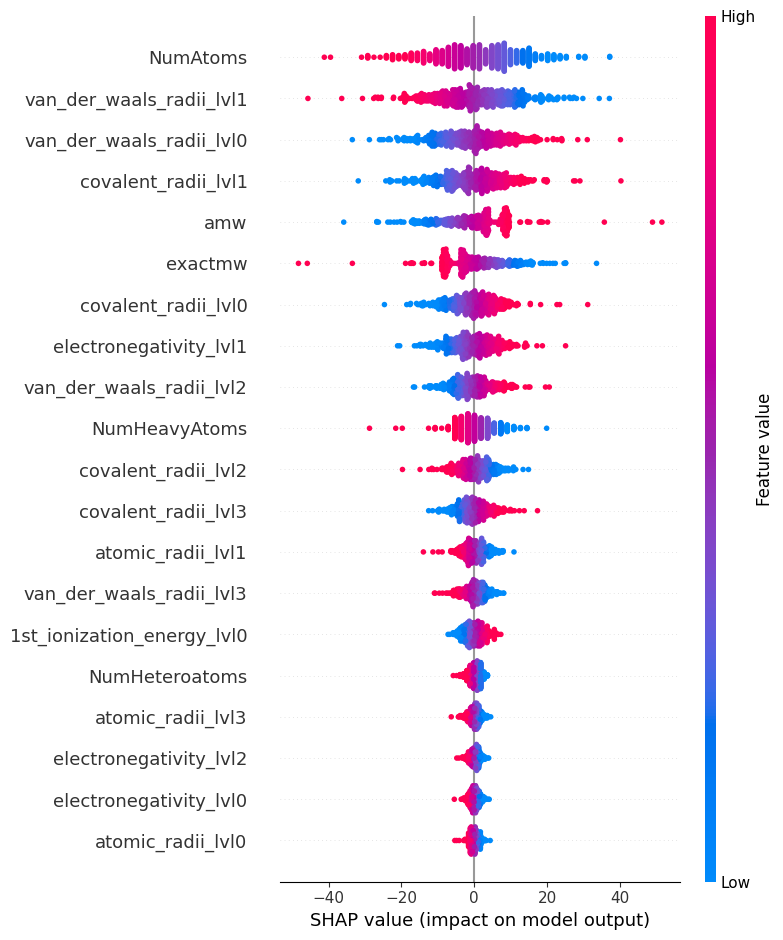

In [81]:
shap.summary_plot(shap_values, X_train.sample(500, random_state=1), feature_names=X_train.columns)

## Lasso Regression

In [82]:
# fit the model
LS = Lasso()
LS.fit(X_train, y_train)
# evaluate the LS
y_predict = LS.predict(X_val)
# evaluate predictions
mae_LS = mean_absolute_error(y_val, y_predict)
print('MAE: %.3f' % mae_LS)

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.201e+05, tolerance: 1.558e+02


MAE: 0.543


#### Feature Importance

Size: 75 , Shape: (75,)


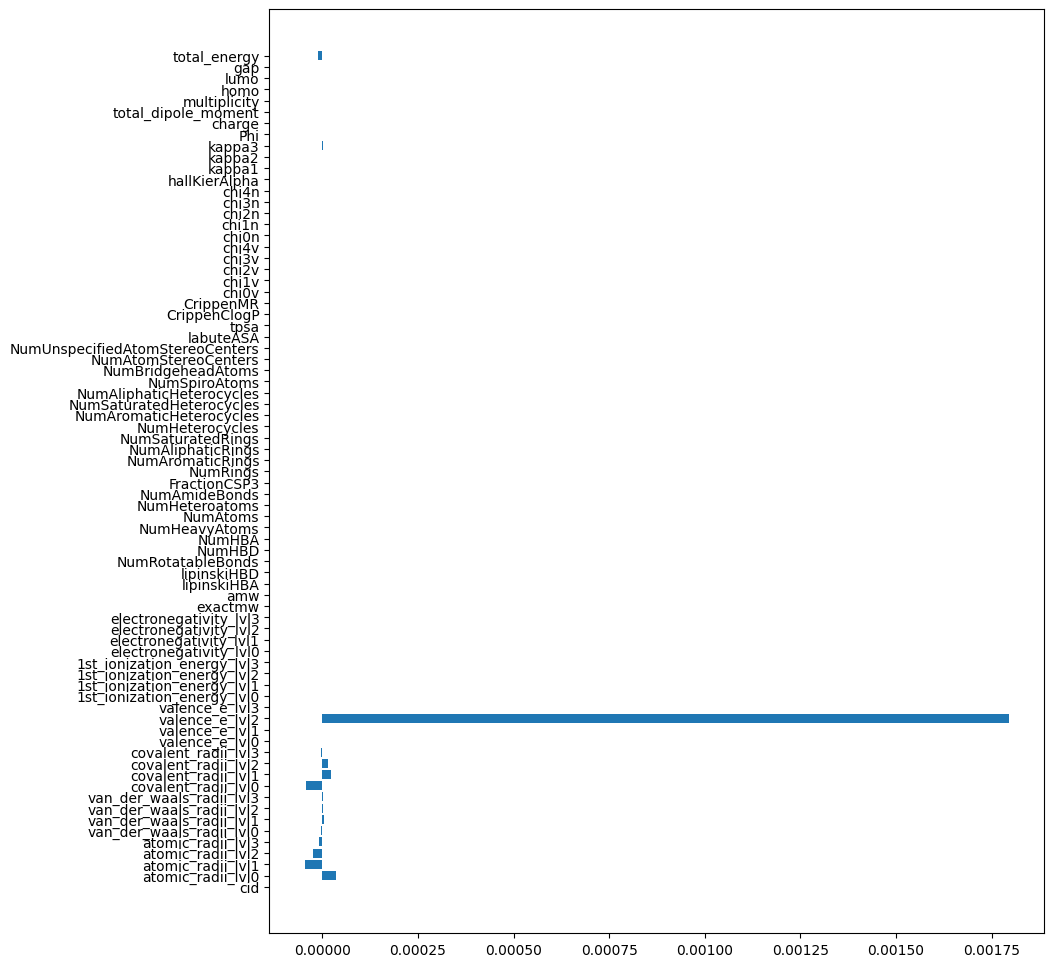

In [86]:
# get importance
importance = LS.coef_
print("Size:", importance.size, ", Shape:", importance.shape)

# plot feature importance
plt.figure(figsize=(10,12))
plt.barh(LS.feature_names_in_, importance.flatten())
plt.show()

#### SHAP

(500, 75)


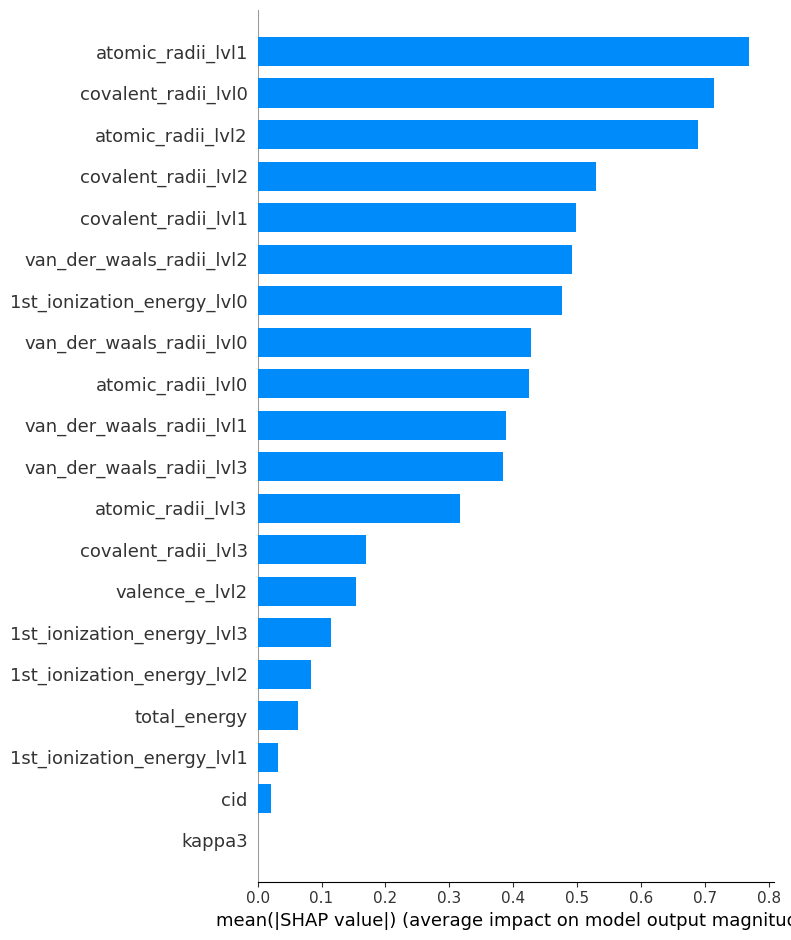

CPU times: total: 984 ms
Wall time: 1e+03 ms


In [83]:
%%time

explainer = shap.Explainer(LS.predict, X_sub)

# Create a linear explainer
LS_explainer = shap.Explainer(LS, X_train, feature_names=X_train.columns.tolist())

# Shap values with tree explainer
shap_values = LS_explainer.shap_values(X_train.sample(500, random_state=1))
print(shap_values.shape)

shap.summary_plot(
    shap_values, X_train.sample(500, random_state=1), feature_names=X_train.columns, plot_type="bar"
)

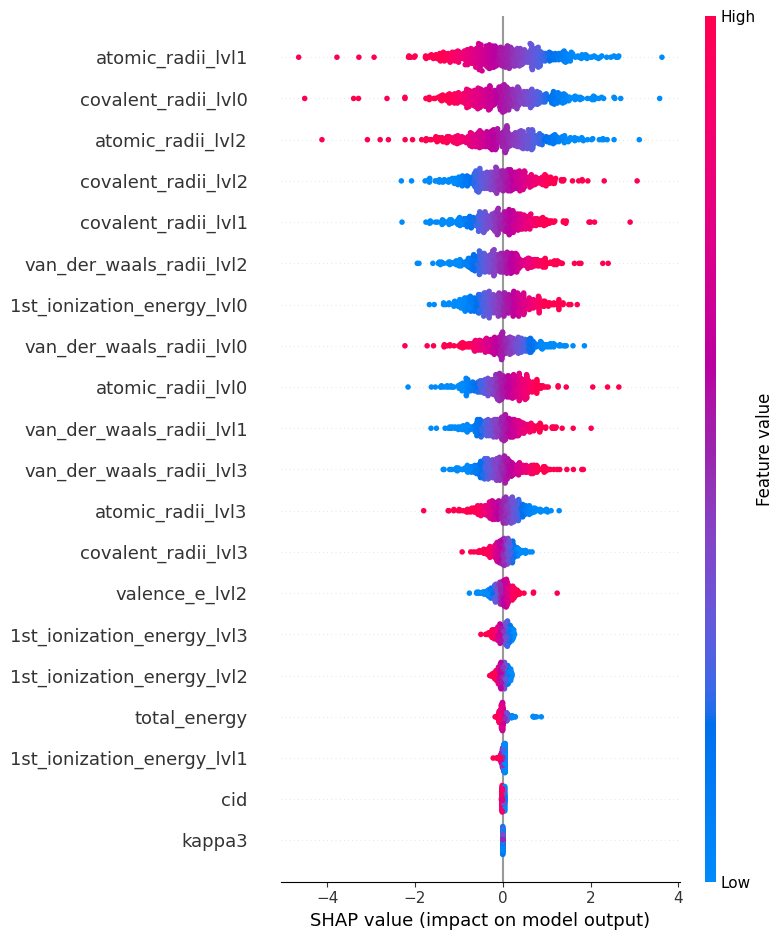

In [84]:
shap.summary_plot(shap_values, X_train.sample(500, random_state=1), feature_names=X_train.columns)